<a href="https://colab.research.google.com/github/M12feiz/Machine-Learning-Model-for-Non-Invasive-Blood-Pressure-Estimation/blob/main/BP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from keras.models import Sequential
import numpy as np
from keras.layers import Dense, Conv1D, Flatten
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd drive/

/content/drive


In [ ]:
cd MyDrive/

/content/drive/MyDrive


In [ ]:
cd FYP/


/content/drive/MyDrive/FYP


In [ ]:
df = pd.read_csv('data.csv')
df = df.drop(['Unnamed: 0'], axis = 1)

In [ ]:
df.head()

,Age,Spo2,HeartRate,BodyTemp,SystolicBP,DiastolicBP
0,25,95,86,98.0,130,80
1,35,95,70,98.0,140,90
2,29,95,80,100.0,90,70
3,30,95,70,98.0,140,85
4,35,98,76,98.0,120,60


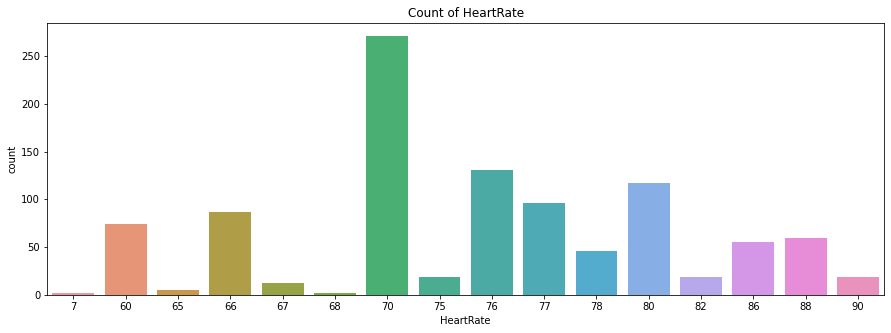

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'HeartRate', data = df)
plt.title('Count of HeartRate')
plt.show()

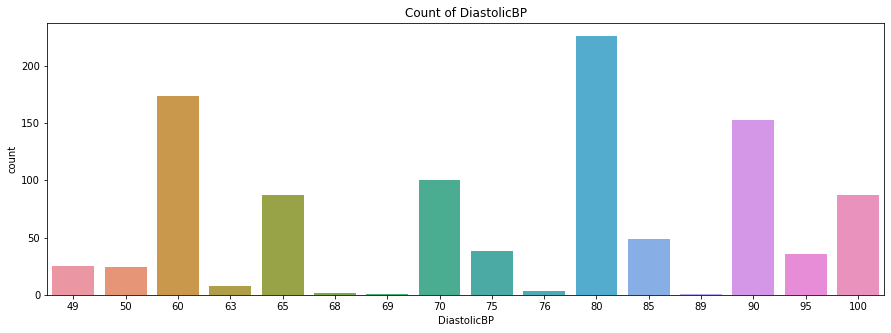

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'DiastolicBP', data = df)
plt.title('Count of DiastolicBP')
plt.show()

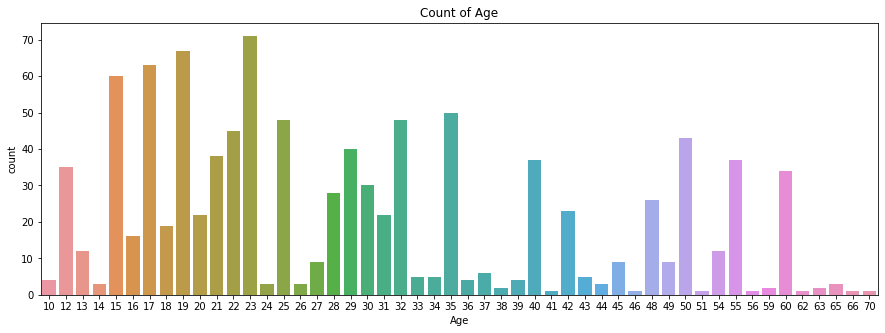

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Age', data = df)
plt.title('Count of Age')
plt.show()

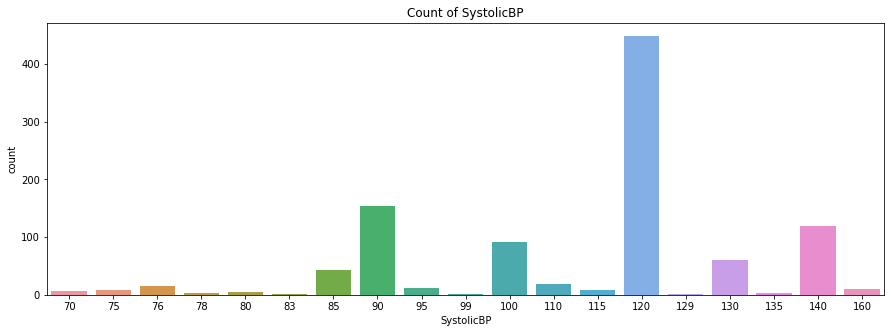

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'SystolicBP', data = df )
plt.title('Count of SystolicBP')
plt.show()

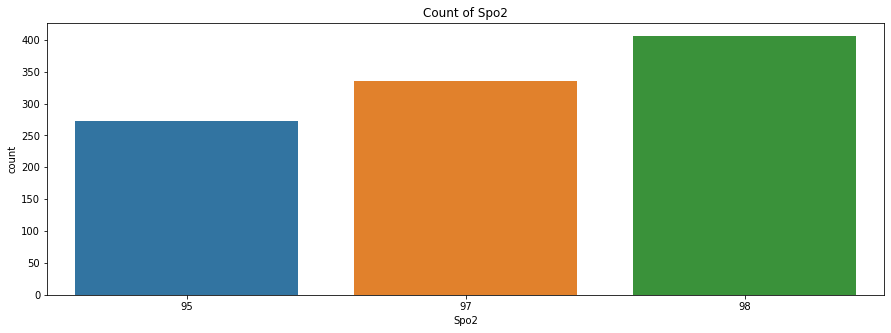

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'Spo2', data = df )
plt.title('Count of Spo2')
plt.show()

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Spo2'}>],
       [<AxesSubplot:title={'center':'HeartRate'}>,
        <AxesSubplot:title={'center':'BodyTemp'}>],
       [<AxesSubplot:title={'center':'SystolicBP'}>,
        <AxesSubplot:title={'center':'DiastolicBP'}>]], dtype=object)

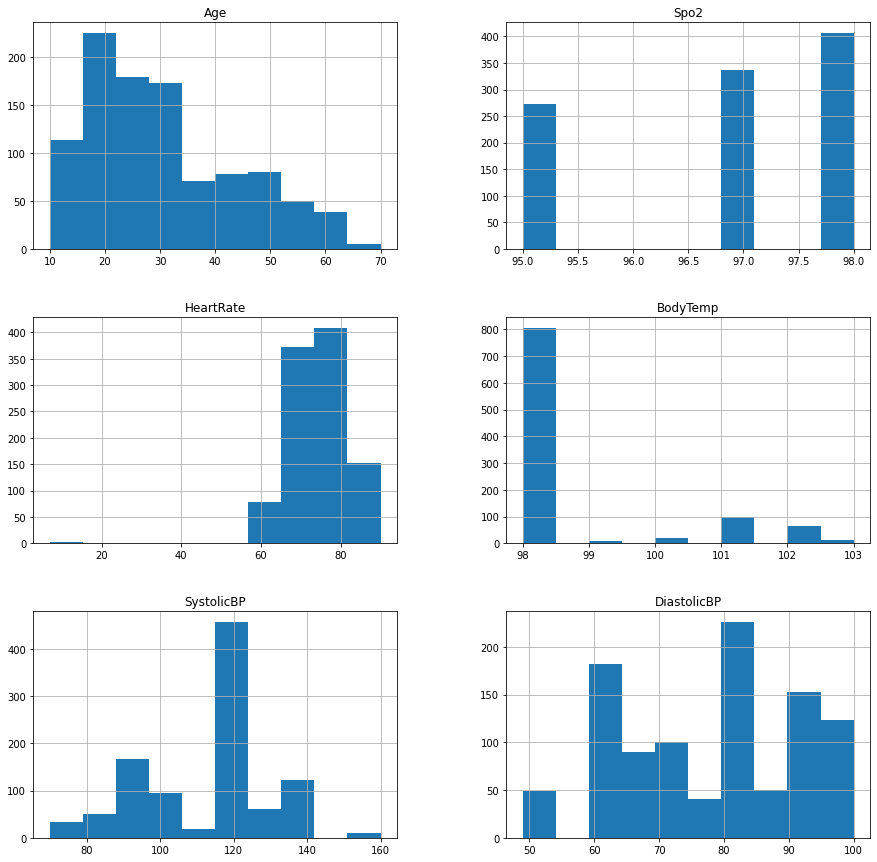

In [ ]:
df.hist(figsize=(15,15))

<AxesSubplot:>

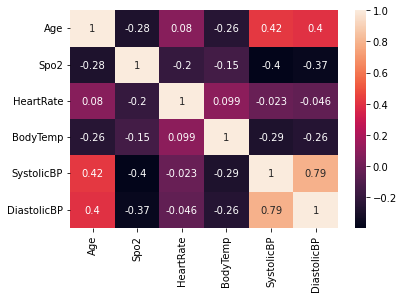

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
X = df.drop(['SystolicBP','DiastolicBP'],axis = 1)
y = df[['SystolicBP', 'DiastolicBP']]

In [ ]:
X_columns = X.columns

In [ ]:
#X = MinMaxScaler().fit_transform(X) #Normalization with MinMax

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
X_test

,Age,Spo2,HeartRate,BodyTemp
921,23,98,70,98.0
75,23,97,70,98.0
608,35,98,66,98.0
630,22,95,80,98.0
380,13,97,80,101.0
...,...,...,...,...
899,19,98,60,98.0
214,28,97,86,101.0
501,15,98,70,98.0
919,19,98,80,98.0


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print('R2 score is:',r2_score(y_test, y_pred))

R2 score is: 0.27673409865871856


In [ ]:
print('MSE is:',mean_squared_error(y_test, y_pred))

MSE is: 197.31154640264776


In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
regr = Ridge().fit(X_train, y_train)

In [ ]:
pred = regr.predict(X_test)

In [ ]:
print('R2 score is:',r2_score(y_test, pred))

R2 score is: 0.27670582555953016


In [ ]:
print('MSE is:',mean_squared_error(y_test, pred))

MSE is: 197.31928013988636


In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
clf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
pred1 = clf.predict(X_test)

In [ ]:
X_test

,Age,Spo2,HeartRate,BodyTemp
921,23,98,70,98.0
75,23,97,70,98.0
608,35,98,66,98.0
630,22,95,80,98.0
380,13,97,80,101.0
...,...,...,...,...
899,19,98,60,98.0
214,28,97,86,101.0
501,15,98,70,98.0
919,19,98,80,98.0


In [ ]:
pred1

array([[116.30894465,  81.98987547],
       [122.71242785,  79.79830988],
       [100.        ,  70.        ],
       [120.54833333,  63.44083333],
       [ 90.        ,  65.        ],
       [137.        ,  87.89375   ],
       [114.75      ,  83.55      ],
       [138.04872905,  99.02436452],
       [ 99.83333333,  65.16666667],
       [ 90.        ,  65.        ],
       [ 77.72410648,  50.96897912],
       [120.        ,  80.        ],
       [120.        ,  89.29695726],
       [ 91.925     ,  61.405     ],
       [ 85.03095238,  60.        ],
       [120.        ,  89.29695726],
       [ 95.95154762,  67.97577381],
       [138.04872905,  99.02436452],
       [138.04872905,  99.02436452],
       [120.        ,  80.        ],
       [114.25609619,  66.38414429],
       [100.03333333,  89.68333333],
       [119.7       ,  60.3       ],
       [139.6       ,  95.55      ],
       [119.9       ,  88.5       ],
       [122.71242785,  79.79830988],
       [130.        ,  70.        ],
 

In [ ]:
print('R2 score is:',r2_score(y_test, pred1))

R2 score is: 0.8480622447720241


In [ ]:
print('MSE is:',mean_squared_error(y_test, pred1))

MSE is: 44.93443983054816


In [ ]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = clf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [ ]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': False}  



In [ ]:
clf_tuned = RandomForestRegressor(n_estimators = 20, min_samples_split= 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 70, bootstrap = False)

In [ ]:
clf_tuned.fit(X_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=70, max_features='sqrt',
                      n_estimators=20)

In [ ]:
pred_tune = clf_tuned.predict(X_test)

In [ ]:
importances = list(clf_tuned.feature_importances_)

feature_list = X_columns

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Age                  Importance: 0.48
Variable: HeartRate            Importance: 0.25
Variable: Spo2                 Importance: 0.16
Variable: BodyTemp             Importance: 0.11


In [ ]:
print('R2 score is:',r2_score(y_test, pred_tune))

R2 score is: 0.8349257223649953


In [ ]:
print('MSE is:',mean_squared_error(y_test, pred_tune))

MSE is: 48.73767453390507


In [ ]:
model1 = Sequential()
model1.add(Dense(128, activation="relu", input_shape=(4,)))
model1.add(Dense(64, activation="relu"))
model1.add(Dense(2, activation="linear"))
model1.compile(loss="mse", optimizer="adam")
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               640       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 9,026
Trainable params: 9,026
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model1.fit(X_train, y_train, batch_size=32,epochs=200,validation_data=(X_test, y_test), verbose=1)

Epoch 1/200
26/26 [==============================] - 6s 10ms/step - loss: 4900.7632 - val_loss: 723.7501
Epoch 2/200
26/26 [==============================] - 0s 4ms/step - loss: 394.0027 - val_loss: 293.8412
Epoch 3/200
26/26 [==============================] - 0s 5ms/step - loss: 262.1126 - val_loss: 270.0525
Epoch 4/200
26/26 [==============================] - 0s 4ms/step - loss: 254.0164 - val_loss: 264.4074
Epoch 5/200
26/26 [==============================] - 0s 4ms/step - loss: 249.3378 - val_loss: 262.1667
Epoch 6/200
26/26 [==============================] - 0s 5ms/step - loss: 244.1173 - val_loss: 257.3727
Epoch 7/200
26/26 [==============================] - 0s 4ms/step - loss: 240.9500 - val_loss: 256.1864
Epoch 8/200
26/26 [==============================] - 0s 4ms/step - loss: 239.1978 - val_loss: 252.8021
Epoch 9/200
26/26 [==============================] - 0s 4ms/step - loss: 235.2417 - val_loss: 251.3847
Epoch 10/200
26/26 [==============================] - 0s 4ms/step - los

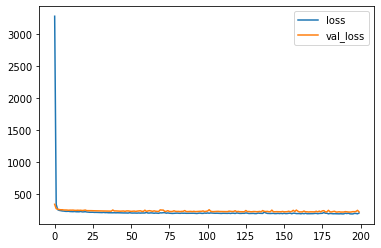

In [ ]:
hist_data = pd.DataFrame(history.history)
hist_data[['loss', 'val_loss']].plot()

In [ ]:
y_pred2 = model1.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [ ]:
print('R2 score is:',r2_score(y_test, y_pred2))

R2 score is: 0.1884405159018659


In [ ]:
print('MSE is:',mean_squared_error(y_test, y_pred2))

MSE is: 220.97337690240374


In [ ]:
#X = X.to_numpy()
x = X.values.reshape(X.shape[0], X.shape[1], 1)
print(x.shape)

(1014, 4, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
model2 = Sequential()
model2.add(Conv1D(32, 2, activation="relu", input_shape=(4, 1)))
model2.add(Flatten())
model2.add(Dense(64, activation="relu"))
model2.add(Dense(2, activation="linear"))
model2.compile(loss="mse", optimizer="adam")
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 3, 32)             96        
                                                                 
 flatten (Flatten)           (None, 96)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                6208      
                                                                 
 dense_4 (Dense)             (None, 2)                 130       
                                                                 
Total params: 6,434
Trainable params: 6,434
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = model2.fit(X_train, y_train, batch_size=32,epochs=200, validation_data=(X_test, y_test), verbose=1)

Epoch 1/200
26/26 [==============================] - 6s 11ms/step - loss: 2651.7327 - val_loss: 317.5762
Epoch 2/200
26/26 [==============================] - 0s 5ms/step - loss: 363.3779 - val_loss: 287.7350
Epoch 3/200
26/26 [==============================] - 0s 5ms/step - loss: 278.4419 - val_loss: 280.8053
Epoch 4/200
26/26 [==============================] - 0s 5ms/step - loss: 267.2792 - val_loss: 274.4067
Epoch 5/200
26/26 [==============================] - 0s 5ms/step - loss: 259.2188 - val_loss: 267.2513
Epoch 6/200
26/26 [==============================] - 0s 5ms/step - loss: 251.8828 - val_loss: 263.2420
Epoch 7/200
26/26 [==============================] - 0s 5ms/step - loss: 245.0067 - val_loss: 256.7135
Epoch 8/200
26/26 [==============================] - 0s 5ms/step - loss: 240.3193 - val_loss: 253.5027
Epoch 9/200
26/26 [==============================] - 0s 5ms/step - loss: 235.9444 - val_loss: 251.0939
Epoch 10/200
26/26 [==============================] - 0s 5ms/step - los

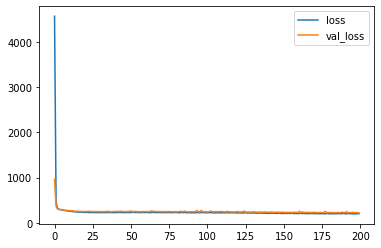

In [ ]:
hist_data2 = pd.DataFrame(history2.history)
hist_data2[['loss', 'val_loss']].plot()

In [ ]:
y_pred3 = model2.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [ ]:
print('R2 score is:',r2_score(y_test, y_pred3))

R2 score is: 0.18372891483629328


In [ ]:
print('MSE is:',mean_squared_error(y_test, y_pred3))

MSE is: 223.35381700396272


# Prediciton Function

In [ ]:
data= int(input('Enter Age: '))
print("---------------------------------------------------------")
data1= int(input('Enter Spo2: '))
print("---------------------------------------------------------")
data2= int(input('Enter HeartRate: '))
print("---------------------------------------------------------")
data3= float(input('Enter BodyTemp: '))
print("---------------------------------------------------------")

test = [data,data1,data2,data3]
test = np.asarray(test)
test = test.reshape(1, -1)
prediction = clf_tuned.predict(test)

print('Your predicted SystolicBP is:' ,prediction[0][0])
print("---------------------------------------------------------")
print('Your predicted DiastolicBP is:' ,prediction[0][1])



Enter Age: 48
---------------------------------------------------------
Enter Spo2: 96
---------------------------------------------------------
Enter HeartRate: 71
---------------------------------------------------------
Enter BodyTemp: 98
---------------------------------------------------------
Your predicted SystolicBP is: 120.0
---------------------------------------------------------
Your predicted DiastolicBP is: 79.0
